In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from pathlib import Path

read vaccination data and vote share data

In [2]:
FILE_PATH = '/Users/johnyz/Desktop/TUM/Politics/Transformations in Political Economy - Technological Change and Populism/assignment/'
vac_path = f'{FILE_PATH}COVID-19_Vaccinations_in_the_United_States_County.csv'
vote_path = f'{FILE_PATH}countypres_2000-2020.csv'

vac_list = ["Date","FIPS","Recip_County","Series_Complete_Yes","Series_Complete_Pop_Pct",
            "Administered_Dose1_Pop_Pct","Administered_Dose1_Recip"]
df1 = pd.read_csv(vac_path, usecols=vac_list)

read control variable data and merge them into different data level

In [3]:
edu_path = f'{FILE_PATH}Education.xls'
edu_list = ['FIPS Code','State','Area name',\
           'Percent of adults with less than a high school diploma, 2015-19',\
           'Percent of adults with a high school diploma only, 2015-19',\
           "Percent of adults completing some college or associate's degree, 2015-19",\
           "Percent of adults with a bachelor's degree or higher, 2015-19"]

prov_path = f'{FILE_PATH}PovertyEstimates.xls'
prov_list = ['FIPStxt','Stabr','Area_name','PCTPOVALL_2019']

unemp_path = f'{FILE_PATH}Unemployment.xlsx'
unemp_list = ['FIPS_Code','State','Area_name','Unemployment_rate_2019','Unemployment_rate_2020']


df_edu = pd.read_excel(edu_path,header = 4,usecols = edu_list).rename(columns={'FIPS Code':'FIPS','Area name':'Area_name'})
df_prov = pd.read_excel(prov_path,header = 4,usecols = prov_list).rename(columns={'FIPStxt':'FIPS','Stabr':'State'})
df_unemp = pd.read_excel(unemp_path,header = 4,usecols = unemp_list).rename(columns={'FIPS_Code':'FIPS'})


In [4]:
control = pd.merge(df_edu,df_prov,on = ['FIPS','State','Area_name'])
control_county = pd.merge(control,df_unemp,on = ['FIPS','State'])
control_state = pd.merge(control,df_unemp,on = ['FIPS','State','Area_name'])

In [5]:
control_county

,FIPS,State,Area_name_x,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,Area_name_y,Unemployment_rate_2019,Unemployment_rate_2020
0,0,US,United States,11.998918,26.956844,28.898697,32.145542,12.3,United States,3.669308,8.05281
1,1000,AL,Alabama,13.819302,30.800268,29.912098,25.468332,15.6,Alabama,3.000000,5.90000
2,1001,AL,Autauga County,11.483395,33.588459,28.356571,26.571573,12.1,"Autauga County, AL",2.700000,4.90000
3,1003,AL,Baldwin County,9.193843,27.659616,31.284081,31.862459,10.1,"Baldwin County, AL",2.800000,5.60000
4,1005,AL,Barbour County,26.786907,35.604542,26.029837,11.578713,27.1,"Barbour County, AL",3.800000,7.00000
...,...,...,...,...,...,...,...,...,...,...,...
3177,56037,WY,Sweetwater County,7.213361,33.041271,37.246979,22.498390,8.3,"Sweetwater County, WY",4.000000,7.40000
3178,56039,WY,Teton County,4.814409,14.876176,23.304277,57.005138,6.0,"Teton County, WY",2.800000,6.00000
3179,56041,WY,Uinta County,7.258562,41.522678,35.189754,16.029003,8.5,"Uinta County, WY",4.000000,6.30000
3180,56043,WY,Washakie County,10.241615,29.751171,36.620987,23.386225,11.1,"Washakie County, WY",4.100000,5.30000


In [6]:
control_state

,FIPS,State,Area_name,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOVALL_2019,Unemployment_rate_2019,Unemployment_rate_2020
0,0,US,United States,11.998918,26.956844,28.898697,32.145542,12.3,3.669308,8.05281
1,1000,AL,Alabama,13.819302,30.800268,29.912098,25.468332,15.6,3.000000,5.90000
2,2000,AK,Alaska,7.152934,28.003729,35.292122,29.551214,10.2,5.400000,7.80000
3,4000,AZ,Arizona,12.860705,23.858877,33.813610,29.466806,13.5,4.900000,7.90000
4,5000,AR,Arkansas,13.430243,34.034885,29.507084,23.027790,16.0,3.500000,6.10000
5,6000,CA,California,16.692171,20.487896,28.893970,33.925964,11.8,4.200000,10.10000
6,8000,CO,Colorado,8.253678,21.368059,29.465919,40.912342,9.4,2.700000,7.30000
7,9000,CT,Connecticut,9.369879,26.854712,24.491169,39.284241,9.9,3.600000,7.90000
8,10000,DE,Delaware,9.982669,31.292805,26.731159,31.993366,11.2,3.700000,7.80000
9,11000,DC,District of Columbia,9.076816,16.835115,15.547361,58.540707,14.1,5.400000,8.00000


## preprocessing on vaccination data

In [7]:
df1 = pd.read_csv(vac_path, usecols=vac_list)

In [8]:
print(df1['FIPS'].unique().shape)

(3226,)


In [9]:
# pd.to_numeric(df1['FIPS'], errors='coerce')
# df1.sort_values('FIPS')
# df1.dtypes
print(df1['FIPS'].unique().shape)
print(df1['Recip_County'].unique().shape)
# df1.groupby('FIPS').idxmax
# df1[['FIPS','Series_Complete_Pop_Pct']].groupby('FIPS').max()

df1 = df1.loc[df1.groupby(['FIPS'])['Series_Complete_Pop_Pct'].idxmax()]  
print(df1['FIPS'].unique().shape)
print(df1['Recip_County'].unique().shape)
# df1 = df1.groupby('FIPS').max()
df1 = df1.reset_index(drop = True)

(3226,)
(1960,)
(3226,)
(1960,)


In [10]:
df_vac = df1[df1["Series_Complete_Pop_Pct"]>0]
df1 #3226 rows × 7 columns
df_vac = df_vac.reset_index(drop = True) #2948 rows × 7 columns
df_vac
df1

,Date,FIPS,Recip_County,Series_Complete_Pop_Pct,Series_Complete_Yes,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
0,07/27/2021,01001,Autauga County,26.1,14561,19174.0,34.3
1,07/27/2021,01003,Baldwin County,31.4,70143,91316.0,40.9
2,07/27/2021,01005,Barbour County,27.7,6826,8496.0,34.4
3,07/27/2021,01007,Bibb County,22.5,5046,6603.0,29.5
4,07/27/2021,01009,Blount County,19.3,11166,14086.0,24.4
...,...,...,...,...,...,...,...
3221,07/27/2021,72153,Yauco Municipio,63.2,21214,24538.0,73.1
3222,07/27/2021,78010,St. Croix Island,0.0,13905,17419.0,0.0
3223,07/27/2021,78020,St. John Island,0.0,2430,2578.0,0.0
3224,07/27/2021,78030,St. Thomas Island,0.0,14878,17531.0,0.0


## preprocessing on vote data

In [11]:
vote_list = ['year','county_name','county_fips','candidate','party','candidatevotes','totalvotes','mode']
df2 = pd.read_csv(vote_path,usecols = vote_list)
df2_R = df2[(df2['year']==2020)&(df2['party']=='REPUBLICAN')]
df2_D = df2[(df2['year']==2020)&(df2['party']=='DEMOCRAT')]
df2['county_fips'].unique().shape

(3156,)

In [12]:
# df2 = df2.groupby('county_fips').sum()
# df2['county_name'].unique().shape #(1865,)
# df2['county_fips'].unique().shape #(3154,)
def percent_cal(df2):
    df2 = df2.groupby(['year','party','candidate','county_name','county_fips','totalvotes']).sum() 
    df2 = df2.reset_index()
    df2 = df2[df2['totalvotes']>0]
    df2['vote_share_pct']=df2['candidatevotes']/df2['totalvotes']*100
    df2 = df2.rename(columns={'county_fips':'key'})
    df2['key']= df2['key'].astype(int)
    return df2

In [13]:
df2_r = percent_cal(df2_R)
df2_d = percent_cal(df2_D)
# df2
# df2_d

In [14]:
# df2_1['percent']= df2['candidatevotes']/df2['totalvotes']*100
# pd2.astype({'county_fips':'int32'}).dtype
# pd2['county_fips'].dtype
# pd2
# df2 = df2.reset_index()
# df2

In [15]:
df1 = df_vac.rename(columns={'FIPS':'key'})
df1['key']=df1['key'].astype(int)
df1

,Date,key,Recip_County,Series_Complete_Pop_Pct,Series_Complete_Yes,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
0,07/27/2021,1001,Autauga County,26.1,14561,19174.0,34.3
1,07/27/2021,1003,Baldwin County,31.4,70143,91316.0,40.9
2,07/27/2021,1005,Barbour County,27.7,6826,8496.0,34.4
3,07/27/2021,1007,Bibb County,22.5,5046,6603.0,29.5
4,07/27/2021,1009,Blount County,19.3,11166,14086.0,24.4
...,...,...,...,...,...,...,...
2943,07/27/2021,72145,Vega Baja Municipio,59.7,29869,33967.0,67.9
2944,07/27/2021,72147,Vieques Municipio,60.9,5105,5458.0,65.1
2945,07/27/2021,72149,Villalba Municipio,71.2,15211,16771.0,78.5
2946,07/27/2021,72151,Yabucoa Municipio,55.5,17931,21450.0,66.4


In [16]:
df2_r = df2_r.rename(columns={'candidatevotes':'republican','vote_share_pct':'republican_share'})
df2_d = df2_d.rename(columns={'candidatevotes':'democrat','vote_share_pct':'democrat_share'})

df2_r =df2_r[['key','republican','republican_share']]
df2_d =df2_d[['key','democrat','democrat_share']]

In [17]:
df3 = pd.merge(df2_r,df1,on =['key'])
df4 = pd.merge(df2_d,df3,on =['key'])
df4

,key,democrat,democrat_share,republican,republican_share,Date,Recip_County,Series_Complete_Pop_Pct,Series_Complete_Yes,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
0,45001,4101.0,32.984799,8215.0,66.074157,07/27/2021,Abbeville County,30.7,7527,8170.0,33.3
1,22001,5443.0,19.148637,22596.0,79.493404,07/27/2021,Acadia Parish,32.2,20008,23296.0,37.5
2,51001,7578.0,44.676335,9172.0,54.073812,07/27/2021,Accomack County,49.3,15936,17700.0,54.8
3,16001,120539.0,46.470359,130699.0,50.387256,07/27/2021,Ada County,45.8,220651,239051.0,49.6
4,19001,1198.0,28.680871,2922.0,69.954513,07/27/2021,Adair County,40.5,2900,3106.0,43.4
...,...,...,...,...,...,...,...,...,...,...,...
2834,51199,17683.0,45.585316,20241.0,52.179629,07/27/2021,York County,36.9,25196,28578.0,41.9
2835,6115,11230.0,37.689623,17676.0,59.323399,07/27/2021,Yuba County,33.6,26412,32084.0,40.8
2836,4027,32210.0,46.092643,36534.0,52.280305,07/27/2021,Yuma County,48.9,104564,121464.0,56.8
2837,8125,785.0,15.759888,4107.0,82.453323,07/27/2021,Yuma County,20.1,2016,2376.0,23.7


In [18]:
data = df4.sort_values('key')
data = data.reset_index(drop = True)

In [19]:
data = data.dropna()
data

,key,democrat,democrat_share,republican,republican_share,Date,Recip_County,Series_Complete_Pop_Pct,Series_Complete_Yes,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct
0,1001,7503.0,27.018365,19838.0,71.436802,07/27/2021,Autauga County,26.1,14561,19174.0,34.3
1,1003,24578.0,22.409030,83544.0,76.171373,07/27/2021,Baldwin County,31.4,70143,91316.0,40.9
2,1005,4816.0,45.788173,5622.0,53.451226,07/27/2021,Barbour County,27.7,6826,8496.0,34.4
3,1007,1986.0,20.698280,7525.0,78.426264,07/27/2021,Bibb County,22.5,5046,6603.0,29.5
4,1009,2640.0,9.569378,24711.0,89.571553,07/27/2021,Blount County,19.3,11166,14086.0,24.4
...,...,...,...,...,...,...,...,...,...,...,...
2834,56037,3823.0,22.894957,12229.0,73.236316,07/27/2021,Sweetwater County,30.6,12944,15427.0,36.4
2835,56039,9848.0,66.599040,4341.0,29.356868,07/27/2021,Teton County,73.1,17155,19035.0,81.1
2836,56041,1591.0,16.819960,7496.0,79.247278,07/27/2021,Uinta County,32.2,6512,7400.0,36.6
2837,56043,651.0,16.145833,3245.0,80.481151,07/27/2021,Washakie County,30.2,2361,2592.0,33.2


# Regression on share and percentage

In [20]:
x1 = data['democrat_share']
x2 = data['republican_share']

y1 = data['Series_Complete_Pop_Pct']
y2 = data['Administered_Dose1_Pop_Pct']

[Text(0, 0.5, 'Vaccination rate'),
 Text(0.5, 0, 'Vote Share of Democrat'),
 Text(0.5, 1.0, 'Vaccination and Voting')]

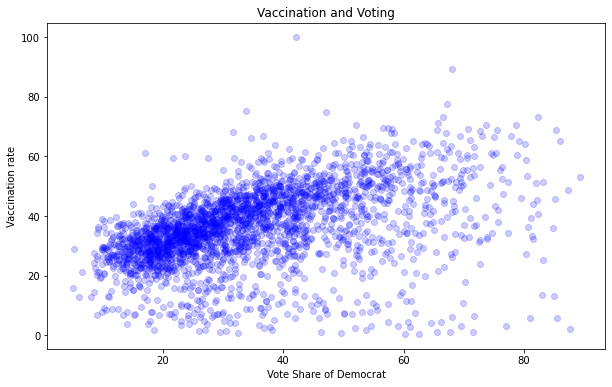

In [21]:
# from rdd import rdd
# data = rdd.bin_data(data, 'Series_Complete_Pop_Pct', 'vote_share_pct', 100)
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.scatter(x1, y1, c="blue",alpha=0.2)
# ax.scatter(x2, y1, c="red",alpha=0.2)

# Set plot title and axes labels
ax.set(title = "Vaccination and Voting",
       ylabel = "Vaccination rate",
       xlabel = "Vote Share of Democrat")

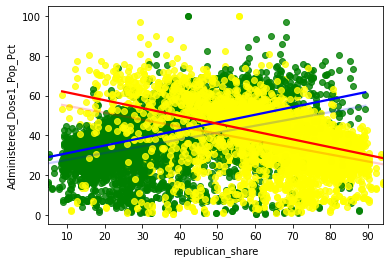

In [22]:
sns.regplot(x1, y1, ci=None, scatter_kws={"color": "green"}, line_kws={"color": "blue","alpha":0.2})
sns.regplot(x2, y1, ci=None, scatter_kws={"color": "yellow"}, line_kws={"color": "red","alpha":0.2})
sns.regplot(x1, y2, ci=None, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(x2, y2, ci=None, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

In [23]:
smf.ols('Series_Complete_Pop_Pct ~ republican_share', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Series_Complete_Pop_Pct   R-squared:                       0.189
Model:                                 OLS   Adj. R-squared:                  0.189
Method:                      Least Squares   F-statistic:                     613.9
Date:                     Mon, 16 Aug 2021   Prob (F-statistic):          5.44e-122
Time:                             22:20:14   Log-Likelihood:                -10176.
No. Observations:                     2632   AIC:                         2.036e+04
Df Residuals:                         2630   BIC:                         2.037e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           58.3863      0.929     62.831      0.000      56.564      60.208
republican_share    -0.3506      0.014    -24.778      0.000      -0.378      -0.323
==============================================================================
Omnibus:                      411.999   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.623
Skew:                          -0.909   Prob(JB):                    8.17e-198
Kurtosis:                       5.230   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
smf.ols('Series_Complete_Pop_Pct ~ democrat_share', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Series_Complete_Pop_Pct   R-squared:                       0.179
Model:                                 OLS   Adj. R-squared:                  0.179
Method:                      Least Squares   F-statistic:                     574.0
Date:                     Mon, 16 Aug 2021   Prob (F-statistic):          6.74e-115
Time:                             22:20:14   Log-Likelihood:                -10192.
No. Observations:                     2632   AIC:                         2.039e+04
Df Residuals:                         2630   BIC:                         2.040e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.1830      0.545     44.394      0.000      23.115      25.251
democrat_share     0.3441      0.014     23.957      0.000       0.316       0.372
==============================================================================
Omnibus:                      395.219   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.664
Skew:                          -0.886   Prob(JB):                    1.41e-184
Kurtosis:                       5.141   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
smf.ols('Administered_Dose1_Pop_Pct ~ republican_share', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Administered_Dose1_Pop_Pct   R-squared:                       0.202
Model:                                    OLS   Adj. R-squared:                  0.202
Method:                         Least Squares   F-statistic:                     667.0
Date:                        Mon, 16 Aug 2021   Prob (F-statistic):          2.85e-131
Time:                                22:20:14   Log-Likelihood:                -10375.
No. Observations:                        2632   AIC:                         2.075e+04
Df Residuals:                            2630   BIC:                         2.077e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           65.5714      1.002     65.427      0.000      63.606      67.537
republican_share    -0.3942      0.015    -25.826      0.000      -0.424      -0.364
==============================================================================
Omnibus:                      512.974   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.044
Skew:                          -1.057   Prob(JB):                    1.00e-281
Kurtosis:                       5.708   Cond. No.                         271.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Administered_Dose1_Pop_Pct   R-squared:                       0.192
Model:                                    OLS   Adj. R-squared:                  0.192
Method:                         Least Squares   F-statistic:                     626.0
Date:                        Mon, 16 Aug 2021   Prob (F-statistic):          4.01e-124
Time:                                22:20:14   Log-Likelihood:                -10391.
No. Observations:                        2632   AIC:                         2.079e+04
Df Residuals:                            2630   BIC:                         2.080e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.0945      0.588     46.116      0.000      25.942      28.247
democrat_share     0.3876      0.015     25.021      0.000       0.357       0.418
==============================================================================
Omnibus:                      495.941   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1214.010
Skew:                          -1.035   Prob(JB):                    2.40e-264
Kurtosis:                       5.605   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# data['vote_share_pct'] = data['vote_share_pct'].astype(float)
# data_modified = data[data['vote_share_pct']>60]
# x_0 = data_modified['vote_share_pct']
# y_0 = data_modified['Series_Complete_Pop_Pct']
# data_modified

# Regression on the population

In [28]:
x1 = data['democrat']
x2 = data['republican']

y1 = data['Series_Complete_Yes']
y2 = data['Administered_Dose1_Recip']

[Text(0, 0.5, 'Vaccination population'),
 Text(0.5, 0, 'Vote number'),
 Text(0.5, 1.0, 'Vaccination and Voting')]

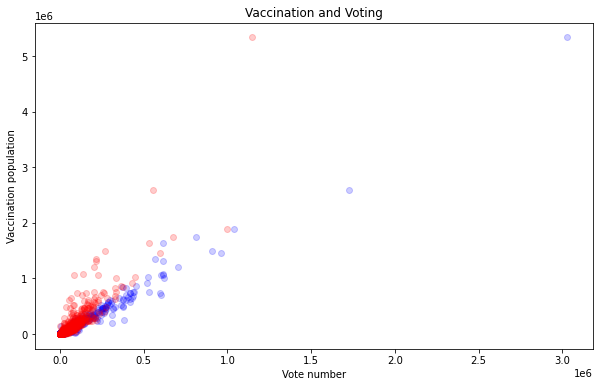

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.scatter(x1, y1, c="blue",alpha=0.2)
ax.scatter(x2, y1, c="red",alpha=0.2)

# Set plot title and axes labels
ax.set(title = "Vaccination and Voting",
       ylabel = "Vaccination population",
       xlabel = "Vote number")

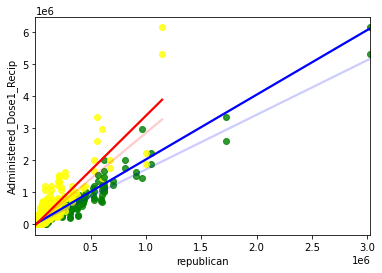

In [30]:
sns.regplot(x1, y1, ci=None, scatter_kws={"color": "green"}, line_kws={"color": "blue","alpha":0.2})
sns.regplot(x2, y1, ci=None, scatter_kws={"color": "yellow"}, line_kws={"color": "red","alpha":0.2})
sns.regplot(x1, y2, ci=None, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
sns.regplot(x2, y2, ci=None, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

In [31]:
smf.ols('Series_Complete_Yes ~ democrat', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Series_Complete_Yes   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.972
Method:                  Least Squares   F-statistic:                 9.060e+04
Date:                 Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                         22:20:15   Log-Likelihood:                -30834.
No. Observations:                 2632   AIC:                         6.167e+04
Df Residuals:                     2630   BIC:                         6.168e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2827.5447    598.678      4.723      0.000    1653.617    4001.473
democrat       1.7079      0.006    300.993      0.000       1.697       1.719
==============================================================================
Omnibus:                     1557.291   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1619288.112
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                     124.485   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
smf.ols('Series_Complete_Yes ~ republican', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Series_Complete_Yes   R-squared:                       0.807
Model:                             OLS   Adj. R-squared:                  0.807
Method:                  Least Squares   F-statistic:                 1.098e+04
Date:                 Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                         22:20:15   Log-Likelihood:                -33366.
No. Observations:                 2632   AIC:                         6.674e+04
Df Residuals:                     2630   BIC:                         6.675e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.16e+04   1659.937    -13.010      0.000   -2.49e+04   -1.83e+04
republican     2.8776      0.027    104.796      0.000       2.824       2.931
==============================================================================
Omnibus:                     4116.213   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5892363.258
Skew:                           9.322   Prob(JB):                         0.00
Kurtosis:                     234.046   Cond. No.                     6.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
smf.ols('Administered_Dose1_Recip ~ democrat', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Administered_Dose1_Recip   R-squared:                       0.965
Model:                                  OLS   Adj. R-squared:                  0.965
Method:                       Least Squares   F-statistic:                 7.233e+04
Date:                      Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                              22:20:15   Log-Likelihood:                -31576.
No. Observations:                      2632   AIC:                         6.316e+04
Df Residuals:                          2630   BIC:                         6.317e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1380.3526    793.587      1.739      0.082    -175.766    2936.471
democrat       2.0230      0.008    268.952      0.000       2.008       2.038
==============================================================================
Omnibus:                     3630.321   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6477393.863
Skew:                           7.041   Prob(JB):                         0.00
Kurtosis:                     245.623   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
smf.ols('Administered_Dose1_Recip ~ republican', data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Administered_Dose1_Recip   R-squared:                       0.807
Model:                                  OLS   Adj. R-squared:                  0.807
Method:                       Least Squares   F-statistic:                 1.101e+04
Date:                      Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                              22:20:15   Log-Likelihood:                -33818.
No. Observations:                      2632   AIC:                         6.764e+04
Df Residuals:                          2630   BIC:                         6.765e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.787e+04   1970.836    -14.143      0.000   -3.17e+04    -2.4e+04
republican     3.4214      0.033    104.946      0.000       3.358       3.485
==============================================================================
Omnibus:                     3837.706   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4094690.356
Skew:                           8.137   Prob(JB):                         0.00
Kurtosis:                     195.543   Cond. No.                     6.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# regression with control

In [35]:
control_county = control_county.rename(columns={'FIPS':'key','Percent of adults with a bachelor\'s degree or higher, 2015-19':'education'})
data_con1 = pd.merge(data,control_county,on = ['key'])

In [36]:
data_con1


,key,democrat,democrat_share,republican,republican_share,Date,Recip_County,Series_Complete_Pop_Pct,Series_Complete_Yes,Administered_Dose1_Recip,...,State,Area_name_x,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19",education,PCTPOVALL_2019,Area_name_y,Unemployment_rate_2019,Unemployment_rate_2020
0,1001,7503.0,27.018365,19838.0,71.436802,07/27/2021,Autauga County,26.1,14561,19174.0,...,AL,Autauga County,11.483395,33.588459,28.356571,26.571573,12.1,"Autauga County, AL",2.7,4.9
1,1003,24578.0,22.409030,83544.0,76.171373,07/27/2021,Baldwin County,31.4,70143,91316.0,...,AL,Baldwin County,9.193843,27.659616,31.284081,31.862459,10.1,"Baldwin County, AL",2.8,5.6
2,1005,4816.0,45.788173,5622.0,53.451226,07/27/2021,Barbour County,27.7,6826,8496.0,...,AL,Barbour County,26.786907,35.604542,26.029837,11.578713,27.1,"Barbour County, AL",3.8,7.0
3,1007,1986.0,20.698280,7525.0,78.426264,07/27/2021,Bibb County,22.5,5046,6603.0,...,AL,Bibb County,20.942602,44.878773,23.800098,10.378526,20.3,"Bibb County, AL",3.1,6.6
4,1009,2640.0,9.569378,24711.0,89.571553,07/27/2021,Blount County,19.3,11166,14086.0,...,AL,Blount County,19.509438,33.422131,33.975021,13.093413,16.3,"Blount County, AL",2.7,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,56037,3823.0,22.894957,12229.0,73.236316,07/27/2021,Sweetwater County,30.6,12944,15427.0,...,WY,Sweetwater County,7.213361,33.041271,37.246979,22.498390,8.3,"Sweetwater County, WY",4.0,7.4
2623,56039,9848.0,66.599040,4341.0,29.356868,07/27/2021,Teton County,73.1,17155,19035.0,...,WY,Teton County,4.814409,14.876176,23.304277,57.005138,6.0,"Teton County, WY",2.8,6.0
2624,56041,1591.0,16.819960,7496.0,79.247278,07/27/2021,Uinta County,32.2,6512,7400.0,...,WY,Uinta County,7.258562,41.522678,35.189754,16.029003,8.5,"Uinta County, WY",4.0,6.3
2625,56043,651.0,16.145833,3245.0,80.481151,07/27/2021,Washakie County,30.2,2361,2592.0,...,WY,Washakie County,10.241615,29.751171,36.620987,23.386225,11.1,"Washakie County, WY",4.1,5.3


In [37]:
smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + PCTPOVALL_2019 + education + Unemployment_rate_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1').summary()

/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1567, but rank is 352
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Administered_Dose1_Pop_Pct   R-squared:                       0.781
Model:                                    OLS   Adj. R-squared:                  0.457
Method:                         Least Squares   F-statistic:                 1.139e+12
Date:                        Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                                22:20:22   Log-Likelihood:                -8658.4
No. Observations:                        2627   AIC:                         2.045e+04
Df Residuals:                            1059   BIC:                         2.966e+04
Df Model:                                1567                                         
Covariance Type:                          HC1                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        51.1948      5.313      9.636      0.000      40.782      61.608
C(Area_name_x)[T.Acadia Parish]                   9.4499      1.146      8.247      0.000       7.204      11.696
C(Area_name_x)[T.Accomack County]                17.6461      0.434     40.626      0.000      16.795      18.497
C(Area_name_x)[T.Ada County]                      1.8153      1.353      1.342      0.180      -0.837       4.467
C(Area_name_x)[T.Adair County]                    5.1037      2.474      2.063      0.039       0.255       9.953
C(Area_name_x)[T.Adams County]                    4.2375      3.420      1.239      0.215      -2.466      10.941
C(Area_name_x)[T.Addison County]                 11.2322      1.467      7.654      0.000       8.356      14.108
C(Area_name_x)[T.Aiken County]                   -1.4192      0.674     -2.105      0.035      -2.741      -0.098
C(Area_name_x)[T.Aitkin County]                  11.4753      1.368      8.386      0.000       8.793      14.157
C(Area_name_x)[T.Alachua County]                  8.3058      1.955      4.249      0.000       4.474      12.137
C(Area_name_x)[T.Alamance County]                 8.1095      0.631     12.857      0.000       6.873       9.346
C(Area_name_x)[T.Alameda County]                 10.7673      1.919      5.611      0.000       7.006      14.528
C(Area_name_x)[T.Albany County]                   4.2137      7.597      0.555      0.579     -10.677      19.104
C(Area_name_x)[T.Albemarle County]              -35.3273      2.307    -15.311      0.000     -39.850     -30.805
C(Area_name_x)[T.Alcona County]                  14.2206      1.374     10.349      0.000      11.527      16.914
C(Area_name_x)[T.Alcorn County]                  -0.3364      1.270     -0.265      0.791      -2.826       2.153
C(Area_name_x)[T.Aleutians East Borough]         39.8641      0.808     49.352      0.000      38.281      41.447
C(Area_name_x)[T.Aleutians West Census Area]     16.1984      1.364     11.877      0.000      13.525      18.872
C(Area_name_x)[T.Alexander County]                0.5513      7.002      0.079      0.937     -13.171      14.274
C(Area_name_x)[T.Alexandria city]               -34.4539      2.780    -12.395      0.000     -39.902     -29.006
C(Area_name_x)[T.Alfalfa County]                 12.3957      1.395      8.886      0.000       9.662      15.130
C(Area_name_x)[T.Alger County]                   13.5258      2.017      6.707      0.000       9.573      17.478
C(Area_name_x)[T.Allamakee County]                9.2111      0.283     32.508      0.000       8.656       9.766
C(Area_name_x)[T.Allegan County

In [38]:
smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + PCTPOVALL_2019 + education + Unemployment_rate_2019', data=data_con1).fit(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Administered_Dose1_Pop_Pct   R-squared:                       0.327
Model:                                    OLS   Adj. R-squared:                  0.326
Method:                         Least Squares   F-statistic:                     207.8
Date:                        Mon, 16 Aug 2021   Prob (F-statistic):          5.02e-155
Time:                                22:20:23   Log-Likelihood:                -10133.
No. Observations:                        2627   AIC:                         2.028e+04
Df Residuals:                            2622   BIC:                         2.030e+04
Df Model:                                   4                                         
Covariance Type:                          HC1                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 58.8151      3.234     18.185      0.000      52.476      65.154
republican_share          -0.3085      0.025    -12.537      0.000      -0.357      -0.260
PCTPOVALL_2019            -0.7919      0.056    -14.091      0.000      -0.902      -0.682
education                  0.2331      0.052      4.479      0.000       0.131       0.335
Unemployment_rate_2019     1.9049      0.210      9.061      0.000       1.493       2.317
==============================================================================
Omnibus:                      714.824   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2863.730
Skew:                          -1.280   Prob(JB):                         0.00
Kurtosis:                       7.428   Cond. No.                         784.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

## table

### education

In [39]:
from stargazer.stargazer import Stargazer
reg0 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share ', data=data_con1).fit(cov_type='HC1')
reg_edu = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education', data=data_con1).fit(cov_type='HC1')
reg_edu_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
reg_edu_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education + C(State)', data=data_con1).fit(cov_type='HC1')
# stargazer_tab_edu = Stargazer([reg0, reg_edu, reg_edu_f1,reg_edu_f2])
# stargazer_tab_edu.covariate_order({'republican_share', 'education'})
# stargazer_tab_edu

In [40]:
d_reg0 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share ', data=data_con1).fit(cov_type='HC1')
d_reg_edu = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education', data=data_con1).fit(cov_type='HC1')
d_reg_edu_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
d_reg_edu_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education + C(State)', data=data_con1).fit(cov_type='HC1')


In [41]:
stargazer_tab_edu = Stargazer([reg0, reg_edu, reg_edu_f1, reg_edu_f2, d_reg0, d_reg_edu, d_reg_edu_f1, d_reg_edu_f2])
stargazer_tab_edu.covariate_order(['republican_share','democrat_share', 'education'])
stargazer_tab_edu

/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '
/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '


## unemployment

In [42]:
reg_unemp = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + Unemployment_rate_2019', data=data_con1).fit(cov_type='HC1')
reg_unemp_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + Unemployment_rate_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
reg_unemp_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + Unemployment_rate_2019 + C(State)', data=data_con1).fit(cov_type='HC1')
d_reg_unemp = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + Unemployment_rate_2019', data=data_con1).fit(cov_type='HC1')
d_reg_unemp_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + Unemployment_rate_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
d_reg_unemp_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + Unemployment_rate_2019 + C(State)', data=data_con1).fit(cov_type='HC1')


In [43]:
stargazer_tab_unemp = Stargazer([reg0, reg_unemp, reg_unemp_f1,reg_unemp_f2,d_reg0, d_reg_unemp, d_reg_unemp_f1,d_reg_unemp_f2])
stargazer_tab_unemp.covariate_order(['republican_share','democrat_share', 'Unemployment_rate_2019'])
stargazer_tab_unemp

/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '
/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '


### proverty

In [44]:
reg_prov= smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + PCTPOVALL_2019', data=data_con1).fit(cov_type='HC1')
reg_prov_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + PCTPOVALL_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
reg_prov_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + PCTPOVALL_2019 + C(State)', data=data_con1).fit(cov_type='HC1')

In [45]:
d_reg_prov= smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + PCTPOVALL_2019', data=data_con1).fit(cov_type='HC1')
d_reg_prov_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + PCTPOVALL_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
d_reg_prov_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + PCTPOVALL_2019 + C(State)', data=data_con1).fit(cov_type='HC1')

In [46]:
stargazer_tab_prov = Stargazer([reg0, reg_prov, reg_prov_f1,reg_prov_f2, d_reg0, d_reg_prov, d_reg_prov_f1, d_reg_prov_f2])
stargazer_tab_prov.covariate_order(['republican_share', 'democrat_share', 'PCTPOVALL_2019'])
stargazer_tab_prov

/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '
/Users/johnyz/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1565, but rank is 350
  warnings.warn('covariance of constraints does not have full '


In [47]:
reg_all= smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education + Unemployment_rate_2019 + PCTPOVALL_2019', data=data_con1).fit(cov_type='HC1')
reg_all_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education + Unemployment_rate_2019 + PCTPOVALL_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
reg_all_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ republican_share + education + Unemployment_rate_2019 + PCTPOVALL_2019 + C(State)', data=data_con1).fit(cov_type='HC1')


In [48]:
d_reg_all= smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education + Unemployment_rate_2019 + PCTPOVALL_2019', data=data_con1).fit(cov_type='HC1')
d_reg_all_f1 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education + Unemployment_rate_2019 + PCTPOVALL_2019 + C(Area_name_x)', data=data_con1).fit(cov_type='HC1')
d_reg_all_f2 = smf.ols('Administered_Dose1_Pop_Pct ~ democrat_share + education + Unemployment_rate_2019 + PCTPOVALL_2019 + C(State)', data=data_con1).fit(cov_type='HC1')


In [49]:
stargazer_tab_all_1 = Stargazer([reg0, reg_edu, reg_unemp, reg_prov, reg_all, reg_edu_f2, reg_unemp_f2, reg_prov_f2, reg_all_f2])
stargazer_tab_all_2 = Stargazer([d_reg0, d_reg_edu, d_reg_unemp, d_reg_prov, d_reg_all, d_reg_edu_f2, d_reg_unemp_f2, d_reg_prov_f2, d_reg_all_f2])
stargazer_tab_all_1.covariate_order(['republican_share', 'education', 'Unemployment_rate_2019', 'PCTPOVALL_2019'])
stargazer_tab_all_2.covariate_order(['democrat_share', 'education', 'Unemployment_rate_2019', 'PCTPOVALL_2019'])
stargazer_tab_all_1

In [50]:
stargazer_tab_all_2

In [51]:
stargazer_final = Stargazer([reg0,reg_edu, reg_unemp, reg_prov, reg_all, reg_all_f2])
stargazer_final.covariate_order(['republican_share', 'education', 'Unemployment_rate_2019', 'PCTPOVALL_2019'])
stargazer_final.rename_covariates({'republican_share':'republican share','education':'education', 'Unemployment_rate_2019':'unemployment', 'PCTPOVALL_2019':'poverty'})
stargazer_final.add_line('Controls', ['', 'X','X','X','X','X'])
stargazer_final.add_line('District FEs', ['', '','', '','','X'])
stargazer_final_d = Stargazer([d_reg0,d_reg_edu, d_reg_unemp, d_reg_prov, d_reg_all, d_reg_all_f2])
stargazer_final_d.covariate_order(['democrat_share', 'education', 'Unemployment_rate_2019', 'PCTPOVALL_2019'])
stargazer_final_d.rename_covariates({'democrat_share':'democrat share','education':'education', 'Unemployment_rate_2019':'unemployment', 'PCTPOVALL_2019':'poverty'})
stargazer_final_d.add_line('Controls', ['', 'X','X','X','X','X'])
stargazer_final_d.add_line('District FEs', ['', '','', '','','X'])

In [52]:
stargazer_final

In [53]:
open('education.tex', 'w').write(stargazer_tab_edu.render_latex())
open('unemployment.tex', 'w').write(stargazer_tab_unemp.render_latex())
open('proverty.tex', 'w').write(stargazer_tab_prov.render_latex())
open('all_controls.tex', 'w').write(stargazer_tab_all_1.render_latex())
open('all_controls_r.tex', 'w').write(stargazer_final.render_latex())
open('all_controls_d.tex', 'w').write(stargazer_final_d.render_latex())

1563